In [0]:
!unzip '/content/drive/My Drive/134715_320111_compressed_IMDB Dataset.csv.zip'


Archive:  /content/drive/My Drive/134715_320111_compressed_IMDB Dataset.csv.zip
  inflating: IMDB Dataset.csv        


In [0]:
import pandas as pd
import numpy as np
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import os
# print(os.listdir("../input"))
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


#Loading IMDB movies review dataset

In [0]:
data=pd.read_csv('IMDB Dataset.csv')

In [0]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


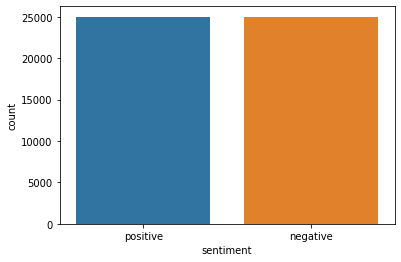

In [0]:
import seaborn as sns
sns.countplot(data['sentiment'])

In [0]:
#split the dataset  
#train dataset
train_reviews=data.review[:40000]
train_sentiments=data.sentiment[:40000]
#test dataset
test_reviews=data.review[40000:]
test_sentiments=data.sentiment[40000:]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(40000,) (40000,)
(10000,) (10000,)


In [0]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [0]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
data['review']=data['review'].apply(denoise_text)

In [0]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
data['review']=data['review'].apply(remove_special_characters)

In [0]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production The filming tech...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,Bad plot bad dialogue bad acting idiotic direc...,negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,Im going to have to disagree with the previous...,negative


In [0]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production The filming tech...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,Bad plot bad dialogue bad acting idiotic direc...,negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,Im going to have to disagree with the previous...,negative


In [0]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
data['review']=data['review'].apply(remove_stopwords)

{'those', 'some', 'a', 'of', 'whom', "couldn't", 'any', 'during', 'what', 'ourselves', 'at', 'how', 'his', 'above', 'am', 'to', 'me', 'shouldn', 've', 'nor', 'such', "doesn't", 'they', 'have', "wasn't", 'them', 'as', 'off', 'do', 'myself', 'it', 'and', "mightn't", "you're", 's', 'are', "you've", 'ain', "wouldn't", 'd', "that'll", 'few', 'isn', 'if', 're', 'these', 'from', "won't", 'can', 'couldn', 'not', 'out', 'herself', 'when', 'haven', "needn't", 'because', 'than', "you'll", "haven't", 'their', 'here', 'the', "it's", 'don', 'is', "mustn't", 'an', 'being', 'but', 'wouldn', 'on', 'there', 'ours', 'will', 'does', 'by', 'had', 'him', 'more', 'yours', 'doing', 'this', 'weren', 'themselves', "shan't", "didn't", "hadn't", 'shan', 'after', 'yourselves', 'aren', 'both', 'up', 'about', 'in', "you'd", 'were', 'most', "don't", 'between', 'into', 'same', 'was', 'did', 'again', 'should', 'himself', 'mustn', 'once', 'down', 'hadn', 'your', 'you', 'yourself', 'why', 'too', 'mightn', 'theirs', 'need

In [0]:
#normalized train reviews
X_train=data.review[:40000]
X_test=data.review[40000:]
y_train=data.sentiment[:40000]
y_test=data.sentiment[40000:]



# norm_train_reviews[0]
# train


In [0]:
max_features=200
tokenizer=Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
list_tokenizer_train=tokenizer.texts_to_sequences(X_train)
list_tokenizer_test=tokenizer.texts_to_sequences(X_test)


In [0]:
maxlen=200
X_t=pad_sequences(list_tokenizer_train,maxlen=maxlen)
X_tes=pad_sequences(list_tokenizer_test,maxlen=maxlen)


In [0]:

from keras.layers import Dense,LSTM,Embedding,Dropout,Activation,GlobalMaxPooling1D
from keras.models import Sequential

#Uploading Glove Embeddings

In [0]:
from zipfile import ZipFile
file='drive/My Drive/glove6b100dtxt.zip'
# file='Word-Embeddding-Sentiment-Classification-master.zip'

with ZipFile(file,'r')as zip:
  zip.extractall()
  print('Done')

Done


In [0]:
import os
embeddings_index = {}
f = open(os.path.join('', 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [0]:
from keras.layers import Embedding

EMBEDDING_DIM=100
embedding_matrix_x = np.zeros((len(tokenizer.word_index) + 1, EMBEDDING_DIM))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix_x[i] = embedding_vector
        
embedding_layer = Embedding(len(tokenizer.word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix_x],
                            input_length=200,
                            trainable=False)

In [0]:
#labeling the sentient data
lb=LabelBinarizer()
#transformed sentiment data
y_test=lb.fit_transform(y_test)
y_train=lb.fit_transform(y_train)

# print(sentiment_data.shape)

In [0]:
embed_Size=128
model=Sequential()
model.add(embedding_layer)
# model.add(Embedding(max_features,embed_Size,input_length=200))
model.add(LSTM(60, name='lstm_layer'))

model.add(Dense(1,activation='sigmoid'))


In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=(['accuracy']))

In [0]:
from sklearn.model_selection import train_test_split
X_tr,X_val,y_tr,y_val=train_test_split(X_t,y_train,test_size=0.2)




In [0]:
X_tr.shape

(32000, 200)

In [0]:
model.fit(X_tr,y_tr,epochs=10,batch_size=32,validation_data=(X_val,y_val))
# model.fit(X_t,y_train,epochs=15,batch_size=16)

Train on 32000 samples, validate on 8000 samples
Epoch 1/10
32000/32000 [==============================] - 484s 15ms/step - loss: 0.5464 - accuracy: 0.7190 - val_loss: 0.4961 - val_accuracy: 0.7590
Epoch 2/10
32000/32000 [==============================] - 488s 15ms/step - loss: 0.4921 - accuracy: 0.7587 - val_loss: 0.5047 - val_accuracy: 0.7449
Epoch 3/10
32000/32000 [==============================] - 489s 15ms/step - loss: 0.4716 - accuracy: 0.7739 - val_loss: 0.4657 - val_accuracy: 0.7789
Epoch 4/10
32000/32000 [==============================] - 489s 15ms/step - loss: 0.4551 - accuracy: 0.7820 - val_loss: 0.4605 - val_accuracy: 0.7794
Epoch 5/10
32000/32000 [==============================] - 494s 15ms/step - loss: 0.4424 - accuracy: 0.7916 - val_loss: 0.4580 - val_accuracy: 0.7809
Epoch 6/10
32000/32000 [==============================] - 492s 15ms/step - loss: 0.4332 - accuracy: 0.7941 - val_loss: 0.4765 - val_accuracy: 0.7660
Epoch 7/10
32000/32000 [==============================] -

In [0]:
model.save_weights("weight.h5")


So we are getting Accuracy of 76% and loss of 0.57

In [0]:
model.evaluate(X_tes,y_test)

10000/10000 [==============================] - 10s 969us/step


[0.5797132350444794, 0.7631000280380249]

This pickle files will be used in app.py while Deploying through Flask

In [0]:
import pickle
# cv=pickle.load(open('tranform.pkl','rb'))

pickle.dump(tokenizer, open('drive/My Drive/tranform.pkl', 'wb'))

In [0]:
pickle.dump(model, open("drive/My Drive/model.pkl", 'wb'))